In [0]:
!wget "https://www.dropbox.com/s/1mtfxlych60okqq/60%20bang%20type%20and%201%20Eng.zip"

--2020-06-05 11:18:19--  https://www.dropbox.com/s/1mtfxlych60okqq/60%20bang%20type%20and%201%20Eng.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1mtfxlych60okqq/60%20bang%20type%20and%201%20Eng.zip [following]
--2020-06-05 11:18:19--  https://www.dropbox.com/s/raw/1mtfxlych60okqq/60%20bang%20type%20and%201%20Eng.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0f8c44417d06c53f46f399da28.dl.dropboxusercontent.com/cd/0/inline/A5GyL85lix81sMICzL1upez4Ijsb9Y2bUEJkNYTfU4kQ4_iPXKLWr9G59l7Zjd2iqci6ew176AfKGGV21_JN-a1dewgryQ58spsYWS3xBVXBrXf0wbFlXDMGmYYxxorUntA/file# [following]
--2020-06-05 11:18:20--  https://uc0f8c44417d06c53f46f399da28.dl.dropboxusercontent.com/cd/0/inline/A5GyL85lix81sMICzL1upez4Ijsb9Y2bUEJkNYT

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# !cp dataset.zip '/content/gdrive/My Drive/data/char lvldata/dataset.zip'

cp: cannot stat 'dataset.zip': No such file or directory


In [0]:
!unzip /content/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: 60 bang type and 1 Eng/40/RinkiyMJ_43_40_17103r1.png  
  inflating: 60 bang type and 1 Eng/40/RinkiyMJ_46_40_17173r1.png  
  inflating: 60 bang type and 1 Eng/40/Rupali.ttf 20040_17243r1.png  
  inflating: 60 bang type and 1 Eng/40/Rupali.ttf 22040_17313r1.png  
  inflating: 60 bang type and 1 Eng/40/Rupali.ttf 25040_17383r1.png  
  inflating: 60 bang type and 1 Eng/40/SabrenaMJ_40_40_17453r1.png  
  inflating: 60 bang type and 1 Eng/40/SabrenaMJ_43_40_17523r1.png  
  inflating: 60 bang type and 1 Eng/40/SabrenaMJ_4640_17593r1.png  
  inflating: 60 bang type and 1 Eng/40/sagarnormal.ttf 20040_17663r1.png  
  inflating: 60 bang type and 1 Eng/40/sagarnormal.ttf 22040_17733r1.png  
  inflating: 60 bang type and 1 Eng/40/sagarnormal.ttf 25040_17803r1.png  
  inflating: 60 bang type and 1 Eng/40/Siyamrupali.ttf 20040_17873r1.png  
  inflating: 60 bang type and 1 Eng/40/Siyamrupali.ttf 22040_17943r1.png  
  inflating: 60 bang t

In [0]:
!mkdir -p data/train

In [0]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import  confusion_matrix

from tensorflow import keras
from tensorflow.keras import backend as K
from IPython.display import SVG
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPool2D
from tensorflow.keras.layers import Activation, Add, BatchNormalization, Dropout
from tensorflow.keras import utils
import pandas as pd
import tensorflow as tf
print("tf version :",tf.__version__)
import time
import shutil

Using TensorFlow backend.


In [0]:
# model = Sequential()

# model.add(Conv2D(activation ='relu', input_shape = (28,28,1), filters=28, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))



# model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(activation ='relu',filters=64, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
# # model.add(Conv2D(activation ='relu',filters=64, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
# model.add(Conv2D(activation ='relu',filters=96, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))


# model.add(Conv2D(activation ='relu',filters=128, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))


# #model.add(Conv2D(activation ='relu', filters=64, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
# #model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))



# #model.add(Conv2D(activation ='relu',filters=64, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
# #model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(units = 61, activation='softmax'))

In [0]:
  model = Sequential()
  model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))   
            
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
            
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  
  model.add(Flatten())

  model.add(Dense(512, activation='relu'))              
  model.add(Dropout(0.5))
  
  model.add(Dense(61, activation='softmax'))

In [0]:

# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.20))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))


# model.add(Dense(61, activation='softmax'))

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
# FAST_RUN = False
# IMAGE_WIDTH=28
# IMAGE_HEIGHT=28
# IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
# IMAGE_CHANNELS=1

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(61, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2769152   
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)              

In [0]:
# model.summary()

In [0]:
optimizer = Adam  (lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=["accuracy"])

In [0]:
def split_dataset_into_test_and_train_sets(all_data_dir, training_data_dir, testing_data_dir, testing_data_pct):
    # Recreate testing and training directories
    if testing_data_dir.count('/') > 1:
        shutil.rmtree(testing_data_dir, ignore_errors=False)
        os.makedirs(testing_data_dir)
        print("Successfully cleaned directory " + testing_data_dir)
    else:
        print("Refusing to delete testing data directory " + testing_data_dir + " as we prevent you from doing stupid things!")

    if training_data_dir.count('/') > 1:
        shutil.rmtree(training_data_dir, ignore_errors=False)
        os.makedirs(training_data_dir)
        print("Successfully cleaned directory " + training_data_dir)
    else:
        print("Refusing to delete testing data directory " + training_data_dir + " as we prevent you from doing stupid things!")

    num_training_files = 0
    num_testing_files = 0

    for subdir, dirs, files in os.walk(all_data_dir):
        category_name = os.path.basename(subdir)

        # Don't create a subdirectory for the root directory
        print(category_name + " vs " + os.path.basename(all_data_dir))
        if category_name == os.path.basename(all_data_dir):
            continue

        training_data_category_dir = training_data_dir + '/' + category_name
        testing_data_category_dir = testing_data_dir + '/' + category_name

        if not os.path.exists(training_data_category_dir):
            os.mkdir(training_data_category_dir)

        if not os.path.exists(testing_data_category_dir):
            os.mkdir(testing_data_category_dir)

        for file in files:
            input_file = os.path.join(subdir, file)
            if np.random.rand(1) < testing_data_pct:
                shutil.copy(input_file, testing_data_dir + '/' + category_name + '/' + file)
                num_testing_files += 1
            else:
                shutil.copy(input_file, training_data_dir + '/' + category_name + '/' + file)
                num_training_files += 1

    print("Processed " + str(num_training_files) + " training files.")
    print("Processed " + str(num_testing_files) + " testing files.")

split_dataset_into_test_and_train_sets(all_data_dir='/content/dataset/', training_data_dir='data/train/', testing_data_dir='data/val/', testing_data_pct=.2)

Successfully cleaned directory data/val/
Successfully cleaned directory data/train/
 vs 
12 vs 
39 vs 
31 vs 
16 vs 
30 vs 
43 vs 
33 vs 
56 vs 
11 vs 
6 vs 
53 vs 
50 vs 
28 vs 
23 vs 
55 vs 
60 vs 
9 vs 
45 vs 
26 vs 
8 vs 
40 vs 
10 vs 
25 vs 
61 vs 
59 vs 
36 vs 
3 vs 
20 vs 
21 vs 
17 vs 
13 vs 
14 vs 
5 vs 
4 vs 
58 vs 
22 vs 
37 vs 
34 vs 
24 vs 
35 vs 
47 vs 
19 vs 
7 vs 
29 vs 
2 vs 
18 vs 
57 vs 
49 vs 
46 vs 
15 vs 
48 vs 
41 vs 
38 vs 
51 vs 
52 vs 
42 vs 
32 vs 
27 vs 
54 vs 
44 vs 
1 vs 
Processed 9022 training files.
Processed 2204 testing files.


In [0]:
train_datagen = ImageDataGenerator(
                                   featurewise_center=False,  # set input mean to 0 over the dataset
                                    samplewise_center=False,  # set each sample mean to 0
                                    featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                    samplewise_std_normalization=False,  # divide each input by its std
                                    zca_whitening=False,  # apply ZCA whitening
                                    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
                                    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
                                    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
                                    horizontal_flip=True,  # randomly flip images
                                    vertical_flip=False)


test_datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
                                  samplewise_center=False,  # set each sample mean to 0
                                  featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                  samplewise_std_normalization=False,  # divide each input by its std
                                  zca_whitening=False,  # apply ZCA whitening
                                  rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
                                  width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
                                  height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
                                  horizontal_flip=True,  # randomly flip images
                                  vertical_flip=False)

In [0]:

train_generator = train_datagen.flow_from_directory(
                                                    'data/train',
                                                    target_size=(28, 28),
                                                    batch_size=64,
                                                    color_mode='grayscale',
                                                    class_mode='categorical'
                                                     )

validation_generator = test_datagen.flow_from_directory(
                                                    'data/val',
                                                    target_size=(28, 28),
                                                    batch_size=64,
                                                    color_mode='grayscale',
                                                    class_mode='categorical' 
                                                     )

Found 9022 images belonging to 61 classes.
Found 2204 images belonging to 61 classes.


In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.000001)

In [0]:
train_set =len(train_generator.filenames)
validation_set =len(validation_generator.filenames )
batch_size = 64

In [0]:
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=train_set //batch_size ,
                    epochs=51,
                    validation_data=validation_generator,
                    validation_steps=validation_set  //batch_size,
                    verbose=1,
                    callbacks=[earlyStopping, mcp_save,learning_rate_reduction])

Epoch 1/51
140/140 [==============================] - 17s 124ms/step - loss: 3.7779 - accuracy: 0.0768 - val_loss: 3.9228 - val_accuracy: 0.0662
Epoch 2/51
140/140 [==============================] - 11s 78ms/step - loss: 2.4216 - accuracy: 0.3046 - val_loss: 2.0562 - val_accuracy: 0.2883
Epoch 3/51
140/140 [==============================] - 11s 79ms/step - loss: 1.6455 - accuracy: 0.4972 - val_loss: 1.1169 - val_accuracy: 0.6005
Epoch 4/51
140/140 [==============================] - 11s 77ms/step - loss: 1.2090 - accuracy: 0.6180 - val_loss: 1.2903 - val_accuracy: 0.6262
Epoch 5/51
140/140 [==============================] - 11s 79ms/step - loss: 0.9547 - accuracy: 0.7024 - val_loss: 1.1344 - val_accuracy: 0.6921
Epoch 6/51
140/140 [==============================] - 11s 79ms/step - loss: 0.7696 - accuracy: 0.7537 - val_loss: 0.9559 - val_accuracy: 0.6266
Epoch 7/51
140/140 [==============================] - 11s 79ms/step - loss: 0.6633 - accuracy: 0.7840 - val_loss: 0.7467 - val_accuracy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


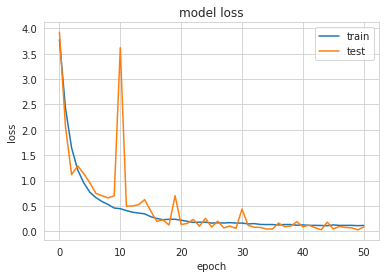

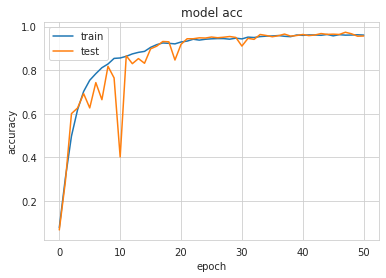

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
sns.set_style("whitegrid")
np.random.seed(697)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
test_generator = ImageDataGenerator()
# !rm -rf '/content/data/train/.ipynb_checkpoints'
print(os.listdir('/content/data/train'))
test_data_generator = test_generator.flow_from_directory(
    '/content/data/train', # Put your path here
    target_size=(28, 28),
    batch_size=128,
    color_mode='grayscale',
    class_mode='categorical' ,
    shuffle=False)

test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   
print('Confusion Matrix')
print(confusion_matrix(true_classes, predicted_classes))

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  



['12', '39', '31', '16', '30', '43', '33', '56', '11', '6', '53', '50', '28', '23', '55', '60', '9', '45', '26', '8', '40', '10', '25', '61', '59', '36', '3', '20', '21', '17', '13', '14', '5', '4', '58', '22', '37', '34', '24', '35', '47', '19', '7', '29', '2', '18', '57', '49', '46', '15', '48', '41', '38', '51', '52', '42', '32', '27', '54', '44', '1']
Found 9022 images belonging to 61 classes.
Confusion Matrix
[[144   0   0 ...   0   2   0]
 [  0 147   0 ...   0   0   0]
 [  0   0 149 ...   0   0   0]
 ...
 [  0   0   0 ... 139   0   0]
 [  0   0   0 ...   0 139   0]
 [  0   0   0 ...   0   0 146]]
              precision    recall  f1-score   support

           1       1.00      0.97      0.99       148
          10       0.97      0.99      0.98       149
          11       0.98      0.94      0.96       159
          12       0.94      1.00      0.97       152
          13       0.85      1.00      0.92       148
          14       0.98      1.00      0.99       145
          1

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
test_generator = ImageDataGenerator()
# !rm -rf '/content/data/val/.ipynb_checkpoints'
print(os.listdir('/content/data/val'))
test_data_generator = test_generator.flow_from_directory(
    '/content/data/val', # Put your path here
    target_size=(28, 28),
    batch_size=128,
    color_mode='grayscale',
    class_mode='categorical' ,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   
print('Confusion Matrix')
print(confusion_matrix(true_classes, predicted_classes))

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  



['12', '39', '31', '16', '30', '43', '33', '56', '11', '6', '53', '50', '28', '23', '55', '60', '9', '45', '26', '8', '40', '10', '25', '61', '59', '36', '3', '20', '21', '17', '13', '14', '5', '4', '58', '22', '37', '34', '24', '35', '47', '19', '7', '29', '2', '18', '57', '49', '46', '15', '48', '41', '38', '51', '52', '42', '32', '27', '54', '44', '1']
Found 2204 images belonging to 61 classes.
Confusion Matrix
[[36  0  0 ...  0  1  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 43  0]
 [ 0  0  0 ...  0  0 37]]
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        37
          10       0.97      1.00      0.99        36
          11       1.00      0.88      0.94        26
          12       0.89      1.00      0.94        33
          13       0.88      0.95      0.91        37
          14       0.95      1.00      0.98        40
          15       1.00      0.84      0.91    

**...........................................END of code ............................................**

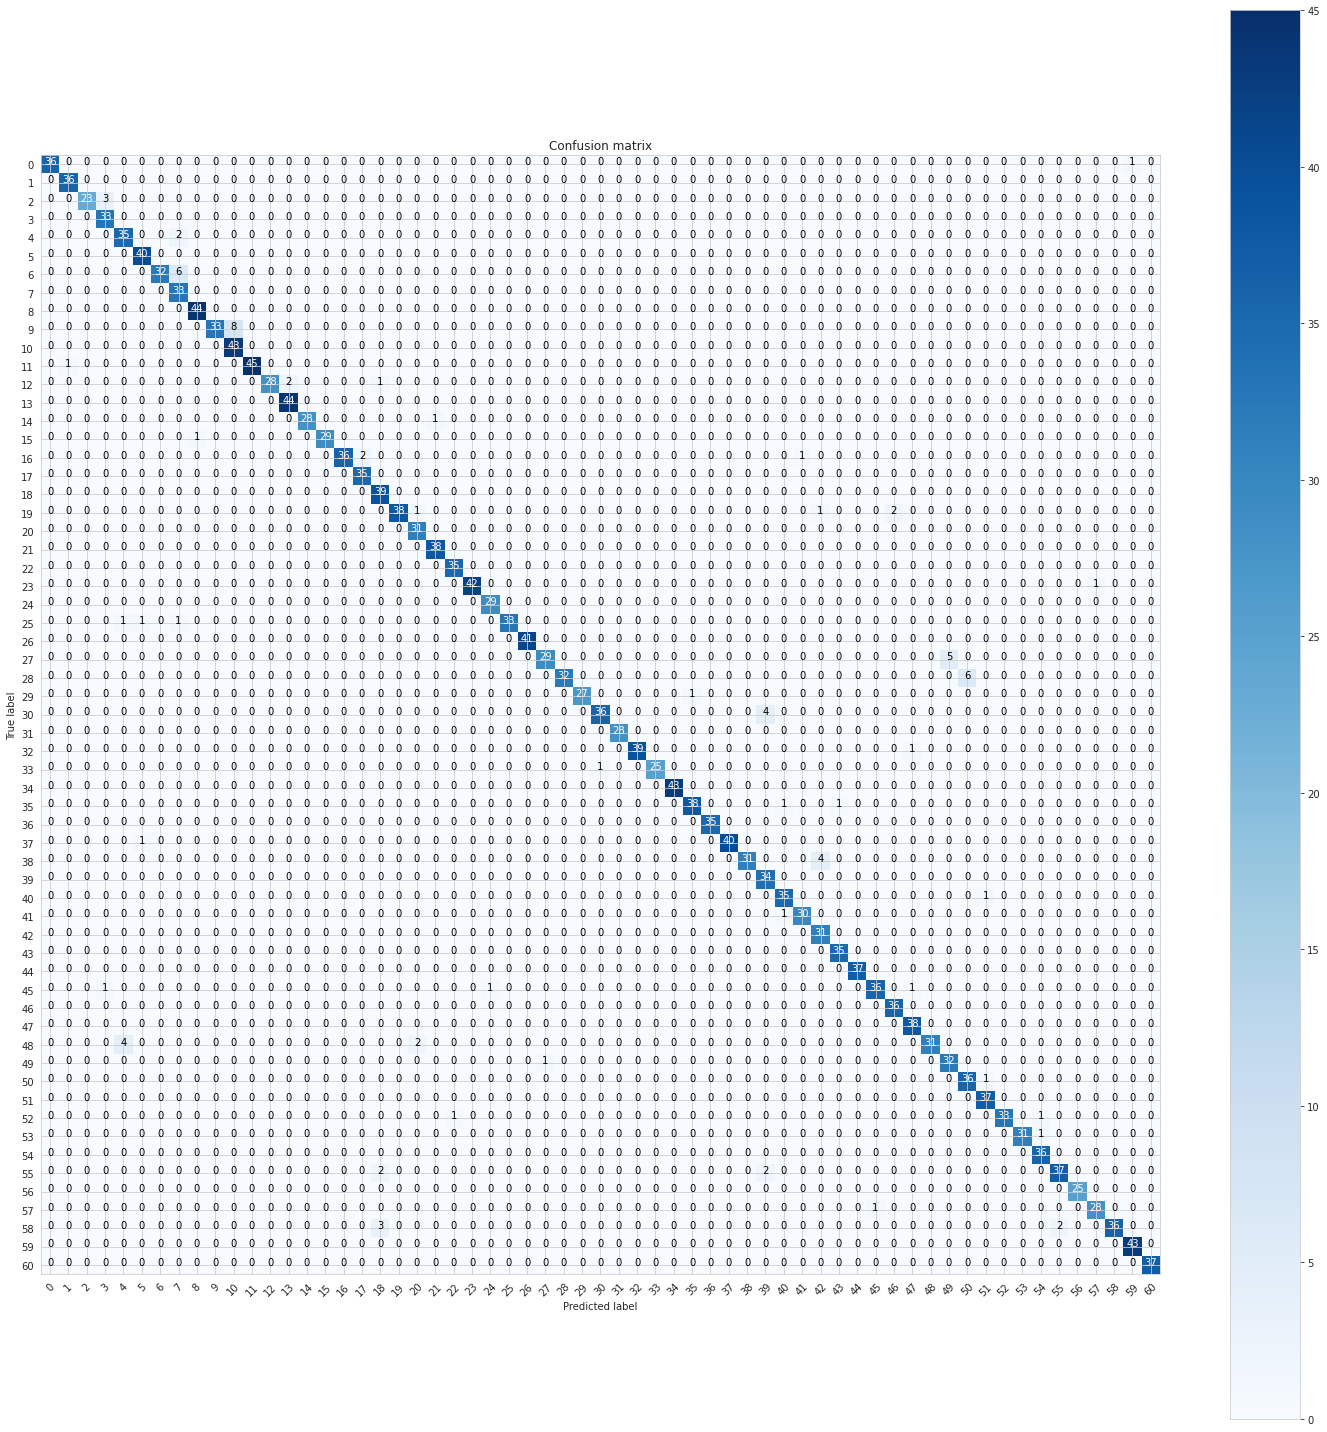

In [0]:
# Look at confusion matrix 
import itertools
plt.rcParams['figure.figsize'] = (20, 20)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matricesfor61classbangengtype.png', dpi=300)


plot_confusion_matrix(confusion_matrix(true_classes, predicted_classes), classes = range(61)) 

In [0]:
pd.set_option('display.max_colwidth', 70)
plt.rcParams['figure.figsize'] = (20, 20)
sns.set(font_scale=1)
sns.set_style('ticks')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


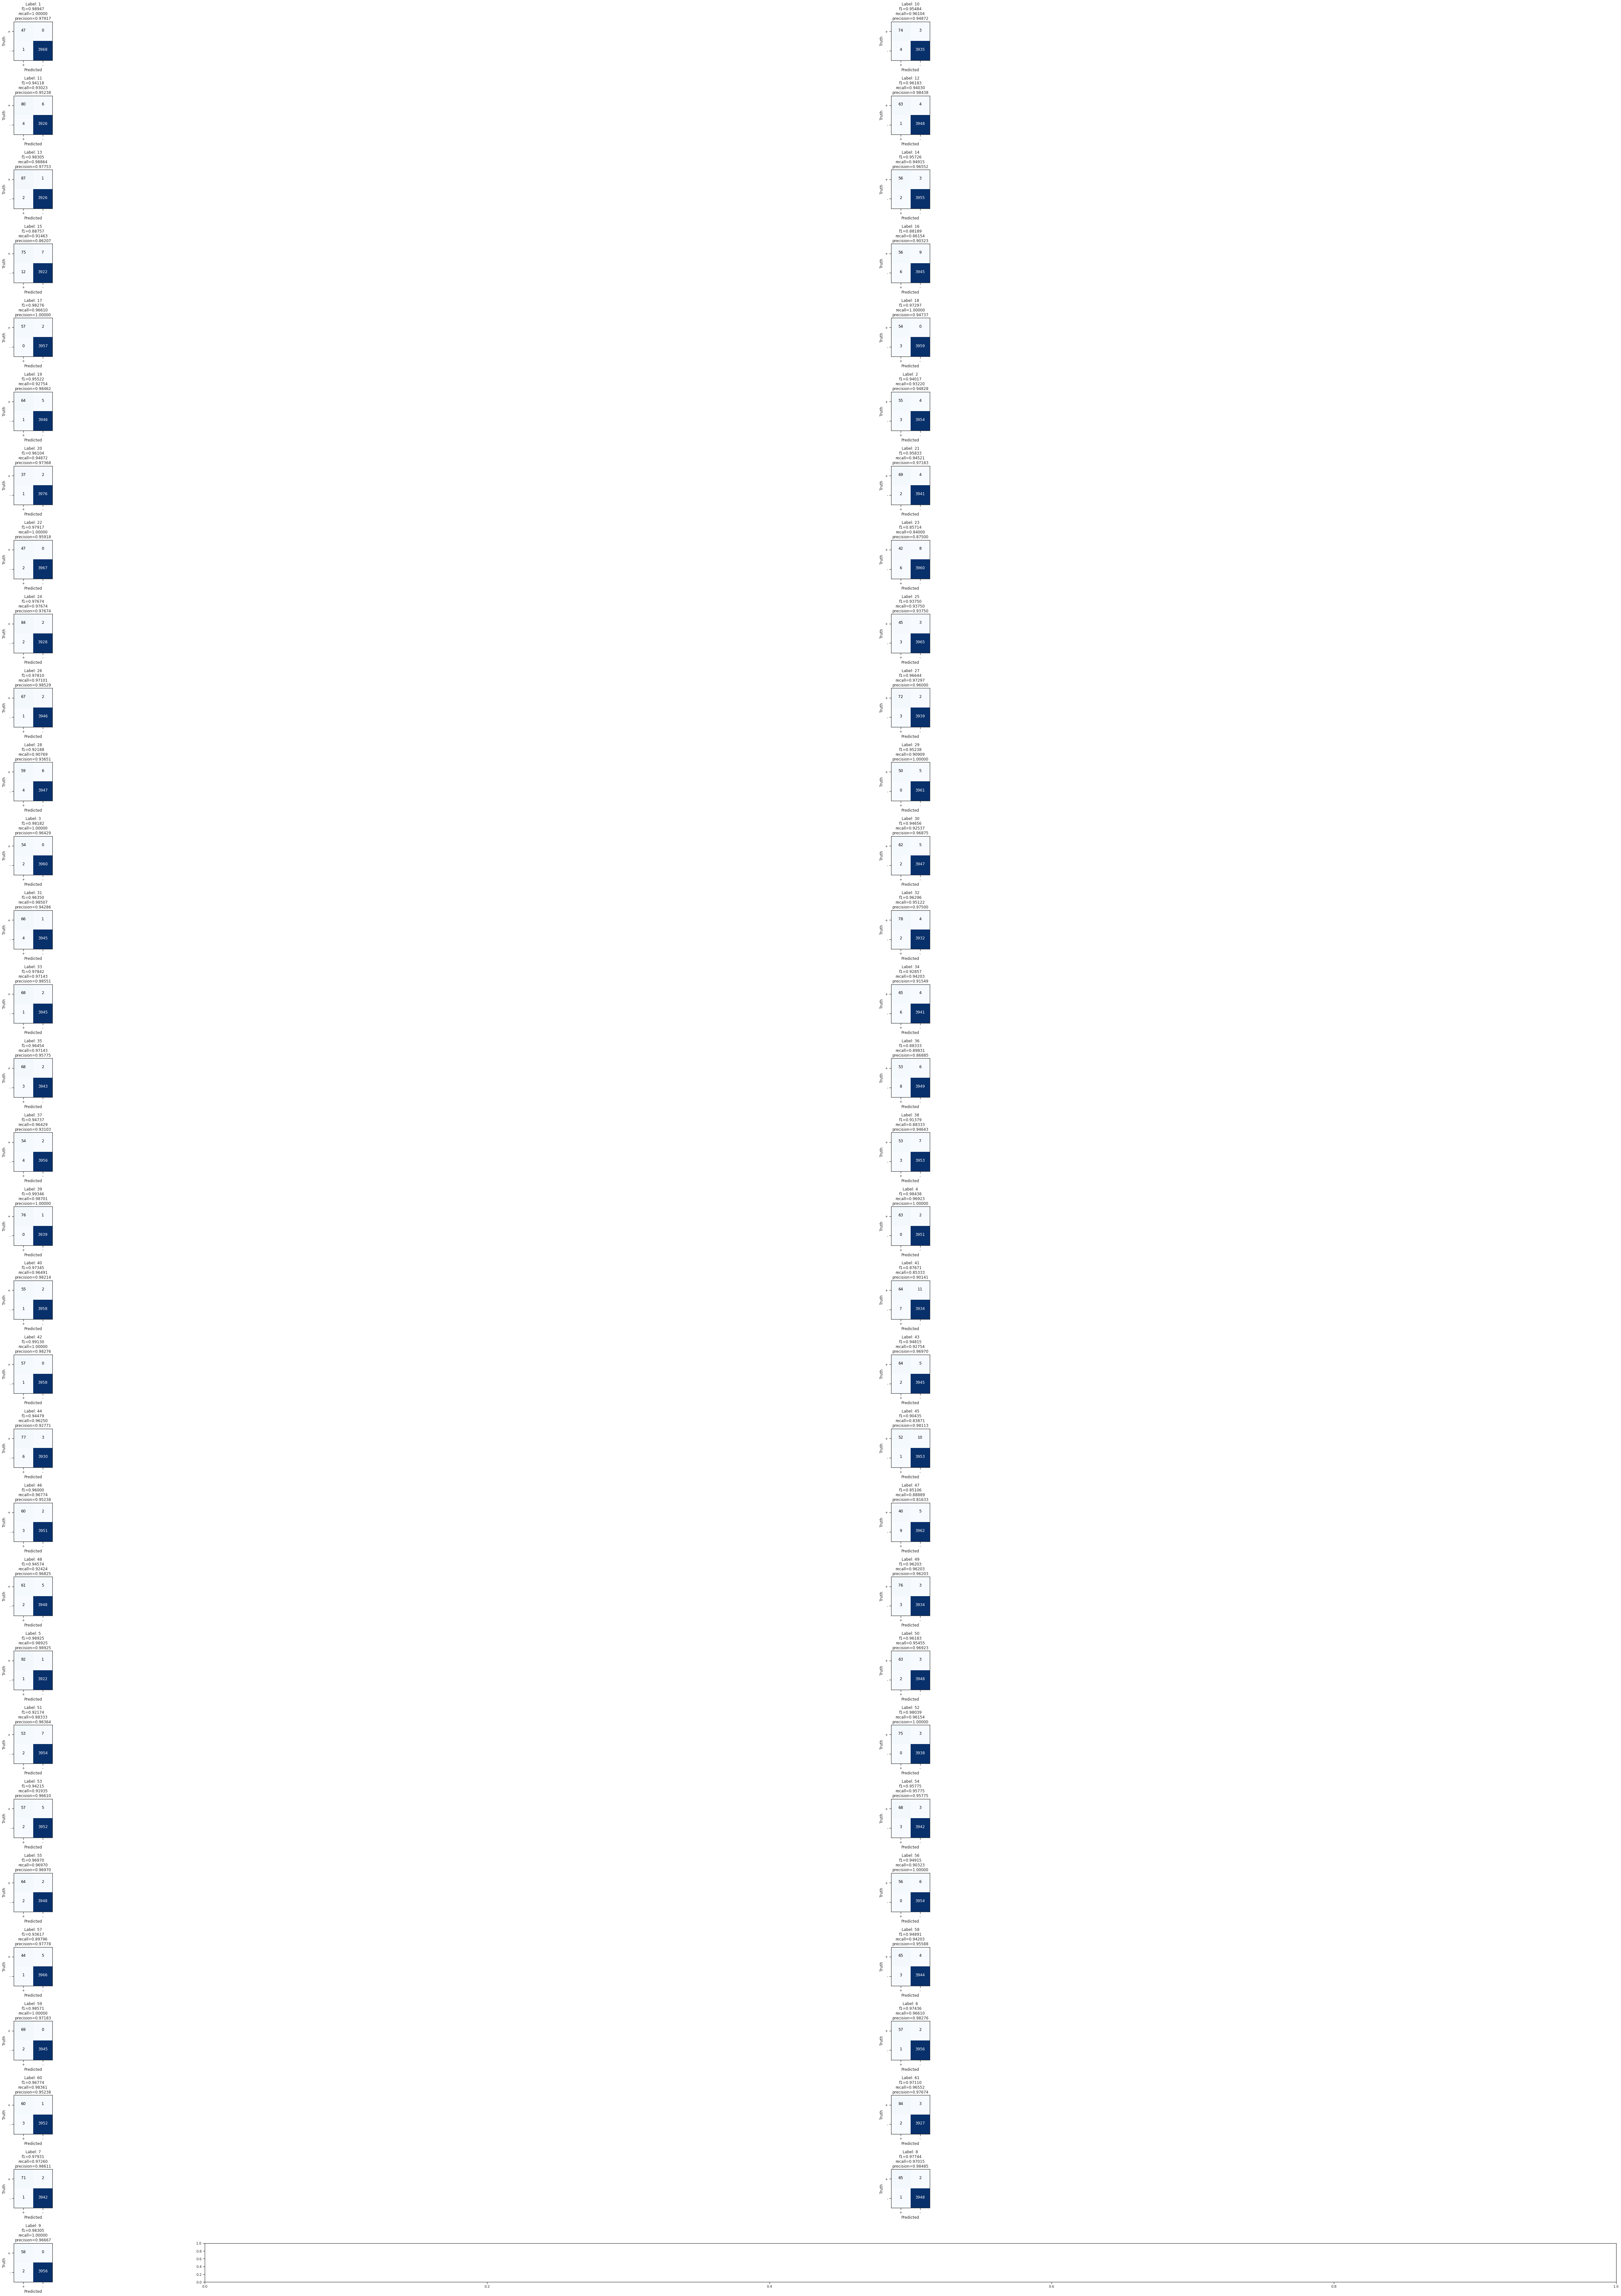

In [0]:
import itertools
nr_batches = 64
threshold = 0.5
img_iter_val_0, img_iter_val_1 = itertools.tee(validation_generator, 2)
y_true = np.vstack(next(img_iter_val_0)[1] for _ in range(nr_batches)).astype('int')
y_pred = (model.predict_generator(img_iter_val_1, steps=nr_batches) > threshold).astype('int')
# print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
plot_multiclass_confusion_matrix(y_true, y_pred, class_name, save_plot=True)

In [0]:
import numpy as np
import math
# test_generator = ImageDataGenerator()
# test_data_generator = test_generator.flow_from_directory(
# test_gen = ImageDataGenerator(rescale=1./255)
# test_data_generator = test_gen.flow_from_dataframe(
#     '/content/data/val/', 
      
#       class_mode='categorical',
#       target_size=(28, 28),
#       batch_size=64,
#       color_mode='grayscale')
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / 64))
 
test_steps_per_epoch = compute_steps_per_epoch(len(validation_generator.classes))
# test_steps_per_epoch = len(validation_generator.filenames) // 64
# print(test_steps_per_epoch)
# 
predictions = model.predict_generator(validation_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [0]:
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())   

In [0]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

           1       0.03      0.03      0.03        31
          10       0.00      0.00      0.00        45
          11       0.02      0.02      0.02        46
          12       0.03      0.02      0.02        41
          13       0.02      0.02      0.02        51
          14       0.00      0.00      0.00        34
          15       0.00      0.00      0.00        48
          16       0.00      0.00      0.00        38
          17       0.03      0.03      0.03        36
          18       0.00      0.00      0.00        32
          19       0.05      0.05      0.05        42
           2       0.00      0.00      0.00        34
          20       0.00      0.00      0.00        26
          21       0.00      0.00      0.00        38
          22       0.07      0.07      0.07        28
          23       0.03      0.03      0.03        32
          24       0.04      0.04      0.04        49
          25       0.03    

In [0]:
import os
print(len(os.listdir("/content/data/val")))
print(len(predicted_classes))

61
2328


In [0]:
len(validation_generator.classes)

2328

AttributeError: ignored

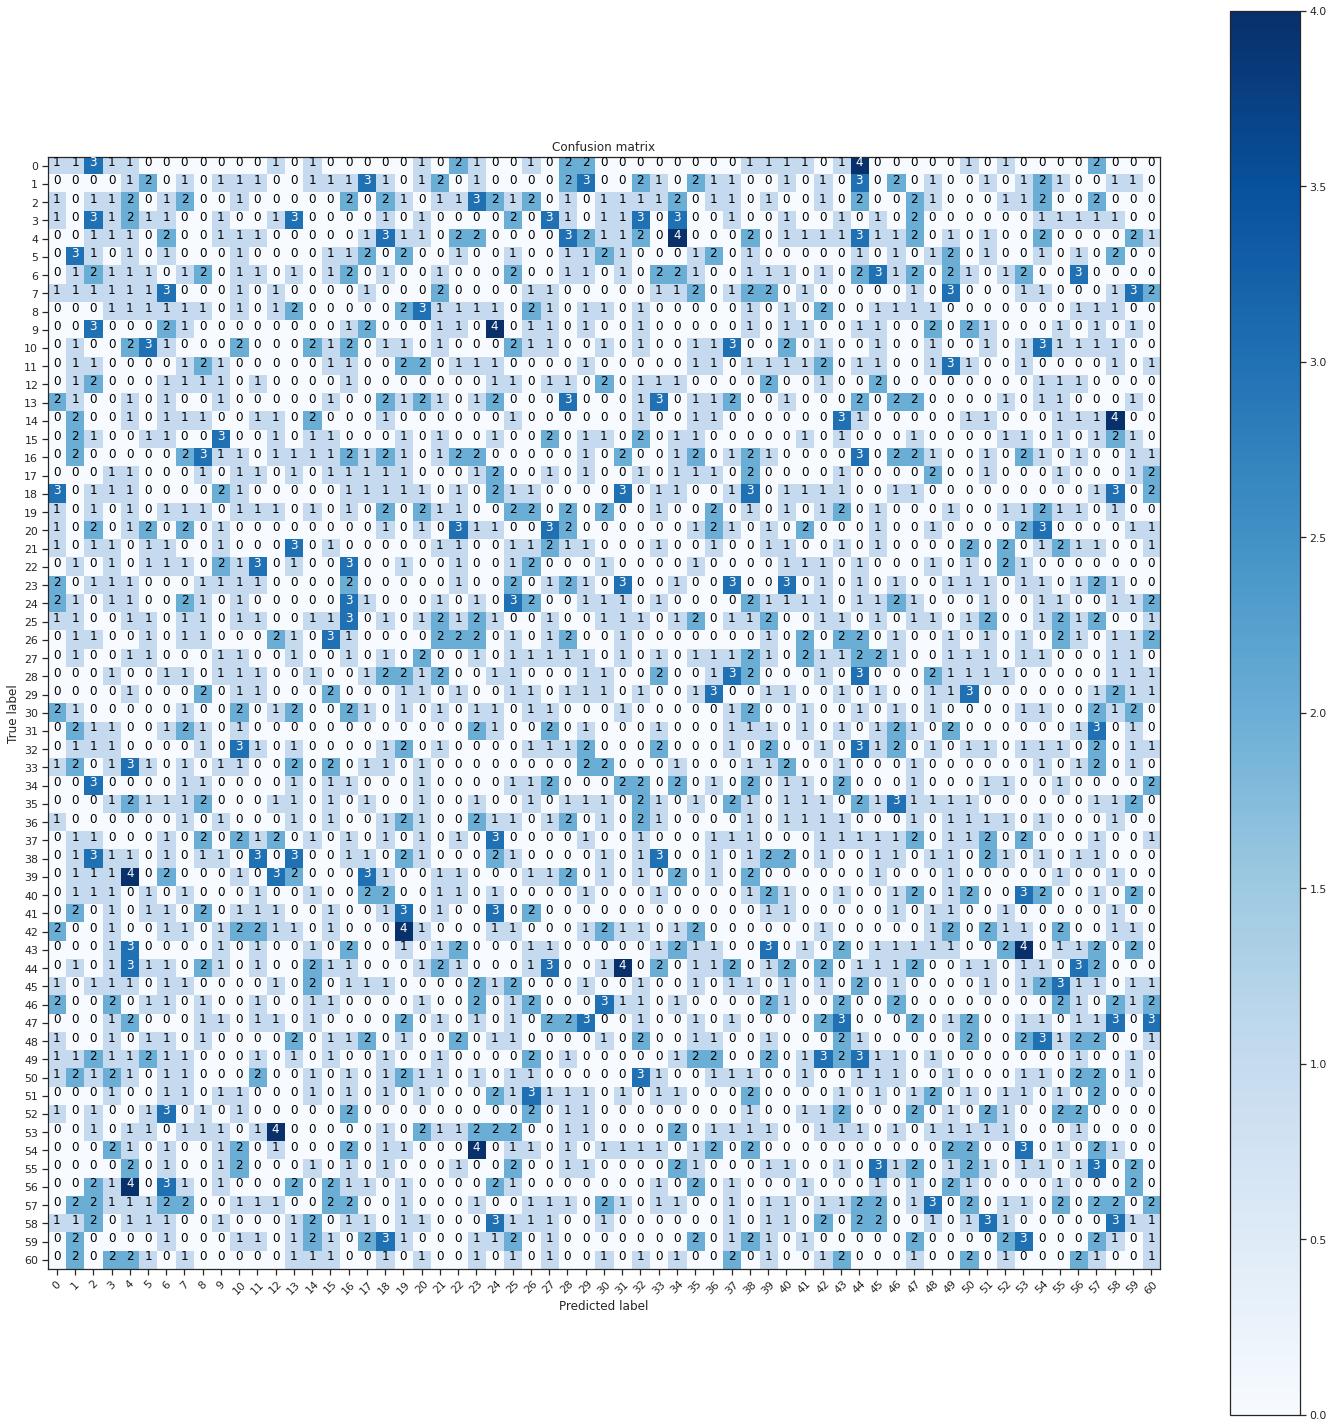

In [0]:
# Look at confusion matrix 
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(confusion_matrix(validation_generator.classes, predicted_classes), classes = range(61)) 

In [0]:
import numpy as np
import cv2
from keras.preprocessing import image
import os
corect=0
noncorect =0
result1 = []
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('/content/61 class bang eng type.hdf5')
for img in os.listdir("/content/data/train/"):
  path = "/content/data/train/"+img+"/"
  for i in os.listdir(path):
    print(int(img))
    imgpath = path+i
    file = cv2.imread(imgpath,0)

    resized_image = cv2.resize(file, (28, 28))
    img_flatten = resized_image.reshape(-1)
    test_image =np.array(img_flatten).reshape(-1, 28, 28, 1)
  # test_image = image.load_img(file, target_size = (28, 28))
  # test_image = image.img_to_array(test_image)
  # test_image = np.expand_dims(test_image, axis = 0)

    result = model.predict(test_image)
    y_pred = np.argmax(result, axis=1)
    if y_pred==int(img):
      
      corect+=1
    else:
      noncorect+=1



    






Streaming output truncated to the last 5000 lines.
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
4

In [0]:
# y_pred = np.argmax(result, axis=1)
print(corect,noncorect)

2 8896


In [0]:


# load and evaluate a saved model
